# Прогноз стоимости полета

## О данных 



Цель исследования — проанализировать набор данных о бронировании рейсов, полученный с веб-сайта «Ease My Trip», и провести различные проверки статистических гипотез, чтобы получить из него значимую информацию. Статистический алгоритм «Линейная регрессия» будет использоваться для обучения набора данных и прогнозирования непрерывной целевой переменной. «Easemytrip» — это интернет-платформа для бронирования авиабилетов и, следовательно, платформа, которую потенциальные пассажиры используют для покупки билетов. Тщательное изучение данных поможет найти ценную информацию, которая будет иметь огромное значение для пассажиров.

## Постановка воросов 


1. Меняется ли цена в зависимости от авиакомпании?
2. Как влияет на цену покупка билетов всего за 1-2 дня до вылета?
3. Изменяется ли цена билета в зависимости от времени отправления и прибытия?
4. Как меняется цена при изменении источника и пункта назначения?
5. Как меняется цена билета в экономическом и бизнес-классе?

## Первичное исследование данных 

In [1]:
#Подключить библеотеки 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# Загркзка данных 
#df = pd.read_csv("Clean_Dataset.csv")
df = pd.read_csv("C:\\Users\\nudan\\Спец курс\\3.1_Clean_Dataset.csv")

In [54]:
# Отображения данных 
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


 Столбец "Unnamed: 0	" дублирует значения индекса

In [55]:
# Удаление столбца "Unnamed: 0 "
df = df.drop("Unnamed: 0", axis=1)
df.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


## Описание признаков 

1. airline (авиакомпания): название авиакомпании хранится в столбце авиакомпании. Это категорическая функция, имеющая 6 разных авиакомпаний.
2. Flight (Рейс): хранит информацию о коде рейса самолета. Это категорический признак.
3. source_city (город вылета): Город, из которого вылетает рейс. Это категориальная особенность, имеющая 6 уникальных городов.
4. departure_time (время отправления): это производная категориальная характеристика, полученная путем группировки периодов времени в ячейки. Он хранит информацию о времени отправления и имеет 6 уникальных меток времени.
5. stops (остановки): категориальный признак с 3 различными значениями, который хранит количество остановок между исходным и конечным городами.
6. arrival_time (время прибытия): это производная категориальная характеристика, созданная путем группировки временных интервалов в ячейки. Он имеет шесть различных меток времени и хранит информацию о времени прибытия.
7. destination_city (город прибытия): город, в котором приземлится рейс. Это категориальная особенность, имеющая 6 уникальных городов.
8. class (класс): категориальный признак, содержащий информацию о классе места; он имеет два различных значения: Бизнес и Экономика.
9.  duration (продолжительность): непрерывная функция, отображающая общее количество времени, которое требуется для перемещения между городами в часах.
10. days_left (осталось дней): это производная характеристика, которая рассчитывается путем вычитания даты поездки из даты бронирования.
11. price (цена): целевая переменная хранит информацию о цене билета.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  int32  
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(8), int64(2)
memory usage: 16.0 MB


In [6]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
df.shape

(300153, 11)

8 признаков категориальные, 1 - добный, 2 - челочисленных, пустые значения отсутствуют, 300153 - кол-во записей, 11 - колонок

In [8]:
# Вывод статистики столбцов типа "object"
df.describe(include=[object])

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [9]:
# Вывод статистики целочисленных столбцов
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Расмотрим ризнаки по отдельности 

In [10]:
# задаем стиль
plt.style.use("bmh")

### Airline

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

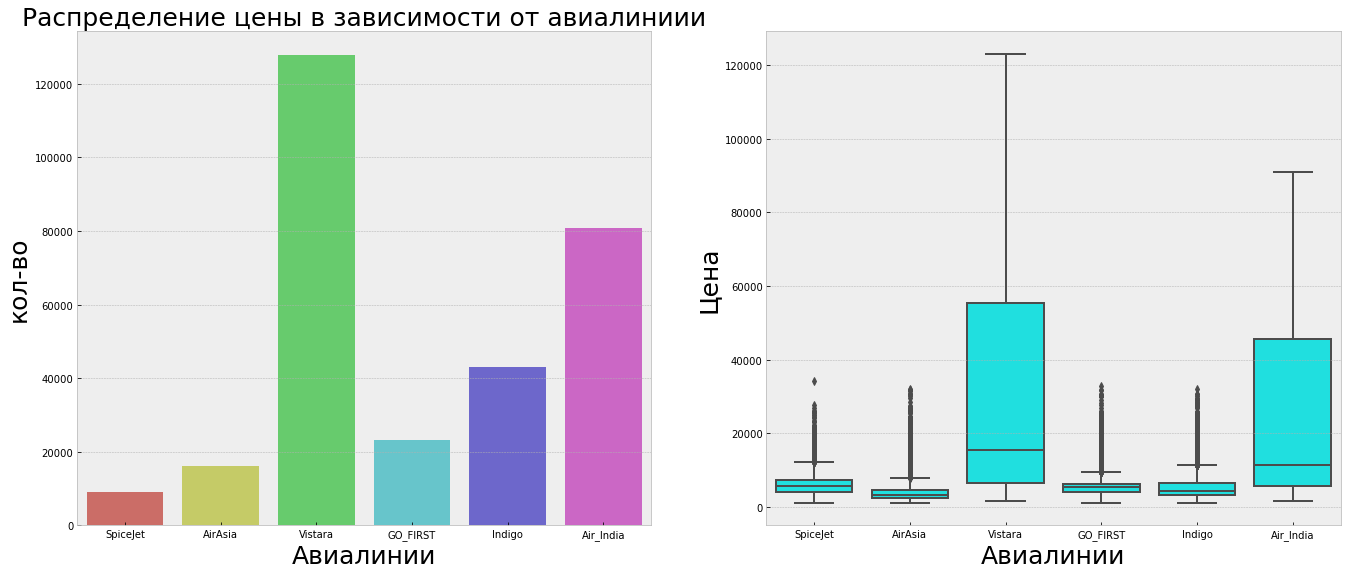

In [11]:
plt.figure(figsize=(35,20))
sns.countplot(df['airline'], ax = plt.subplot(2,3,1), palette='hls')
plt.title('Распределение цены в зависимости от авиалиниии',fontsize=25)
plt.xlabel('Авиалинии',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['airline'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('Авиалинии',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Самой дорогой авиакомпании является "Vistera", а самой дешёвой "SpiceJet"

### Flight

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'кол-во')

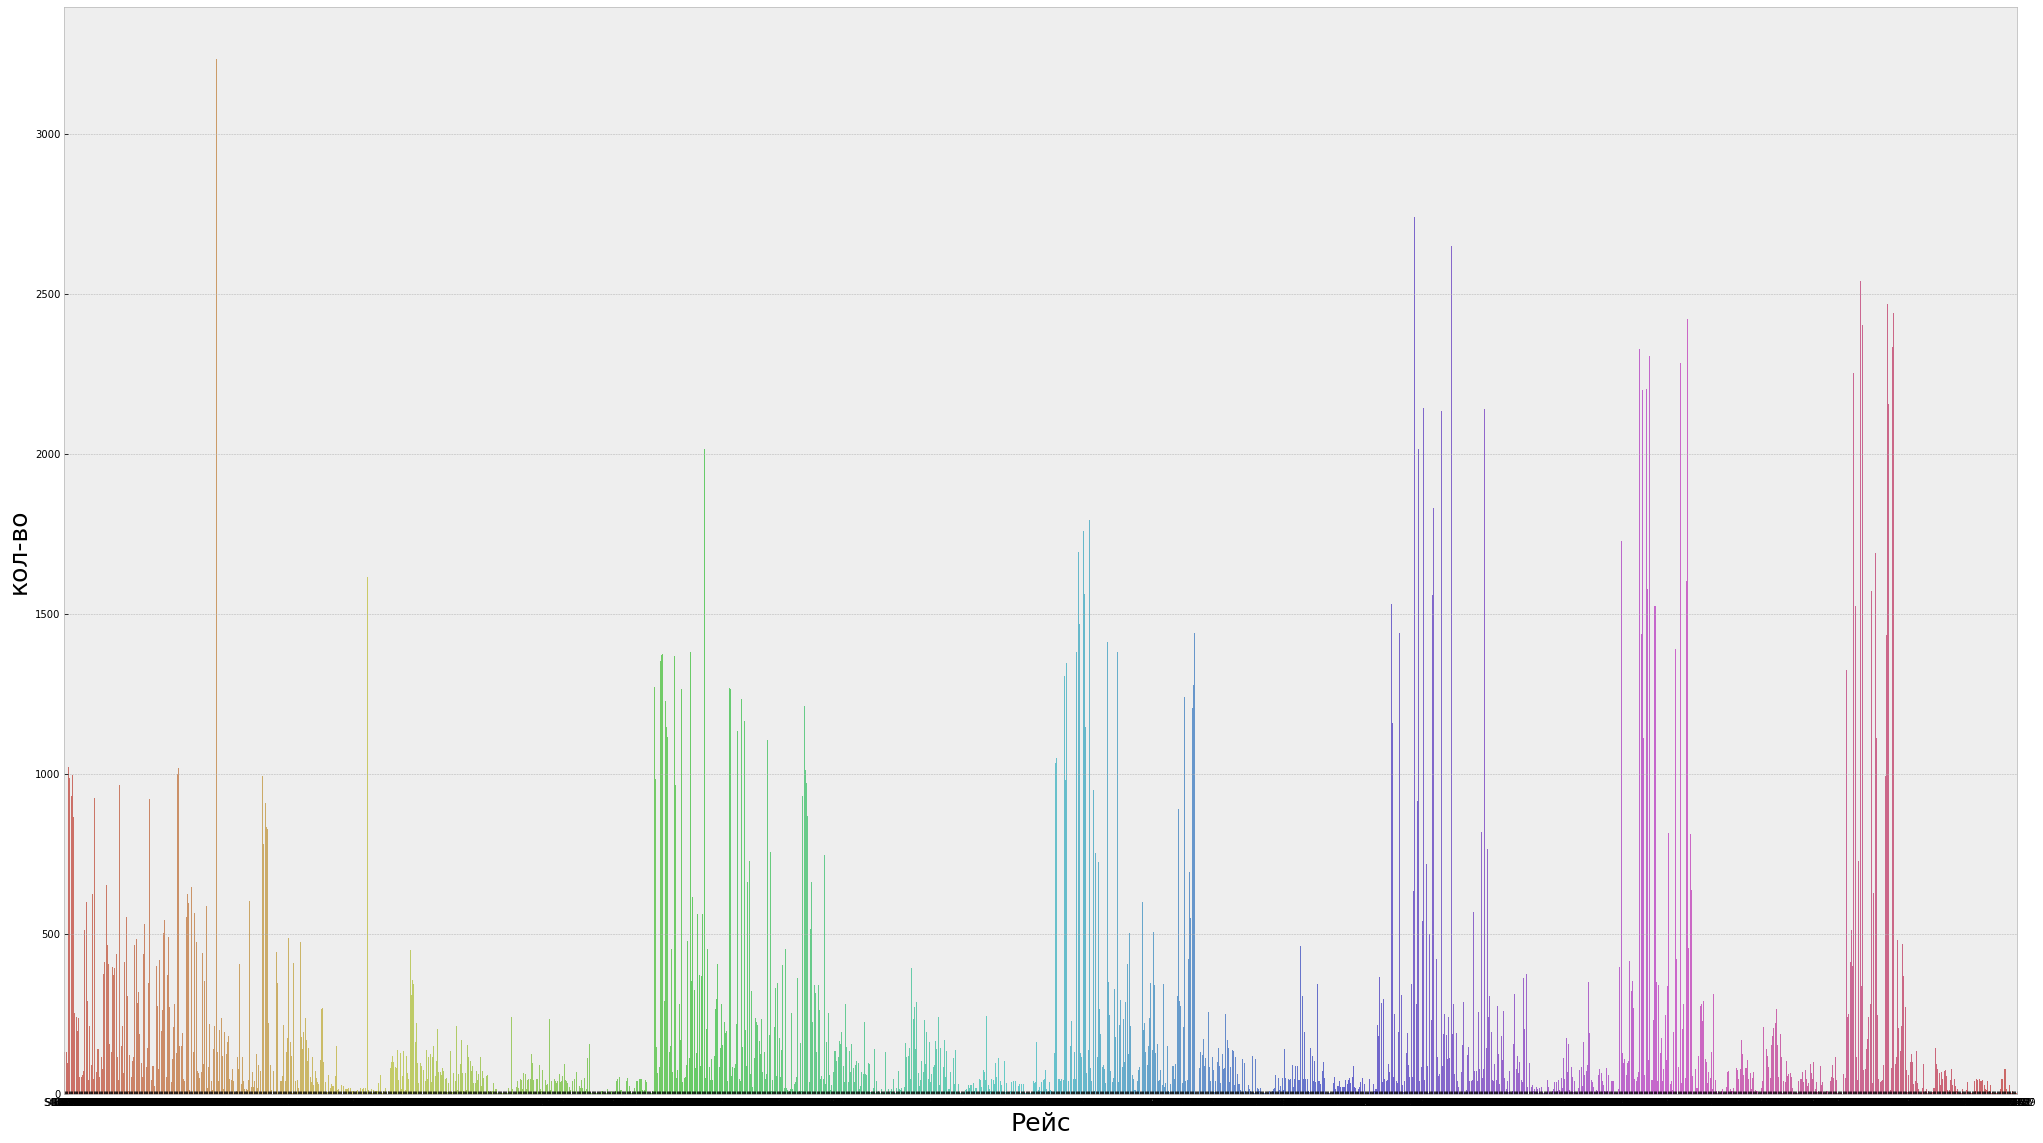

In [12]:
plt.figure(figsize=(35,20))
sns.countplot(df['flight'],  palette='hls')

plt.xlabel('Рейс',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

Большое разнообразие рейсов (самолетов), описание признака как категориального, не являться верным

### Source City

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

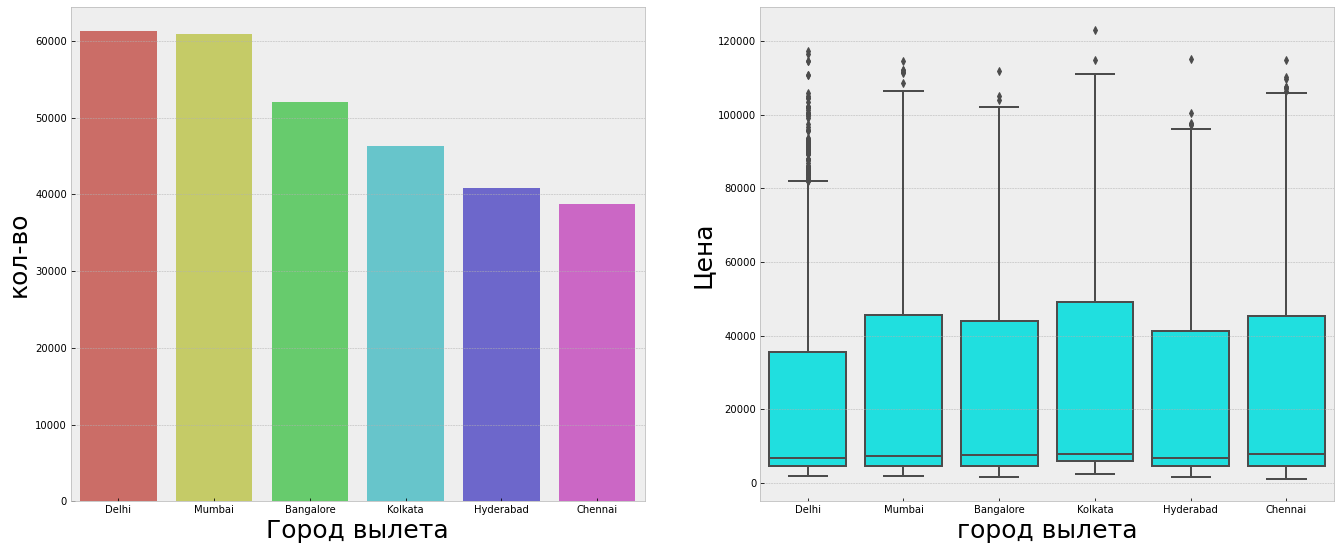

In [13]:
plt.figure(figsize=(35,20))
sns.countplot(df['source_city'], ax = plt.subplot(2,3,1), palette='hls')
plt.xlabel('Город вылета',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['source_city'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('город вылета',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Из Дели больше всего вылетов и дешевле всего билеты, из Ченаи меньше всего вылетают, а Колката имеет самые дорогие билеты 

### Departure Time

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

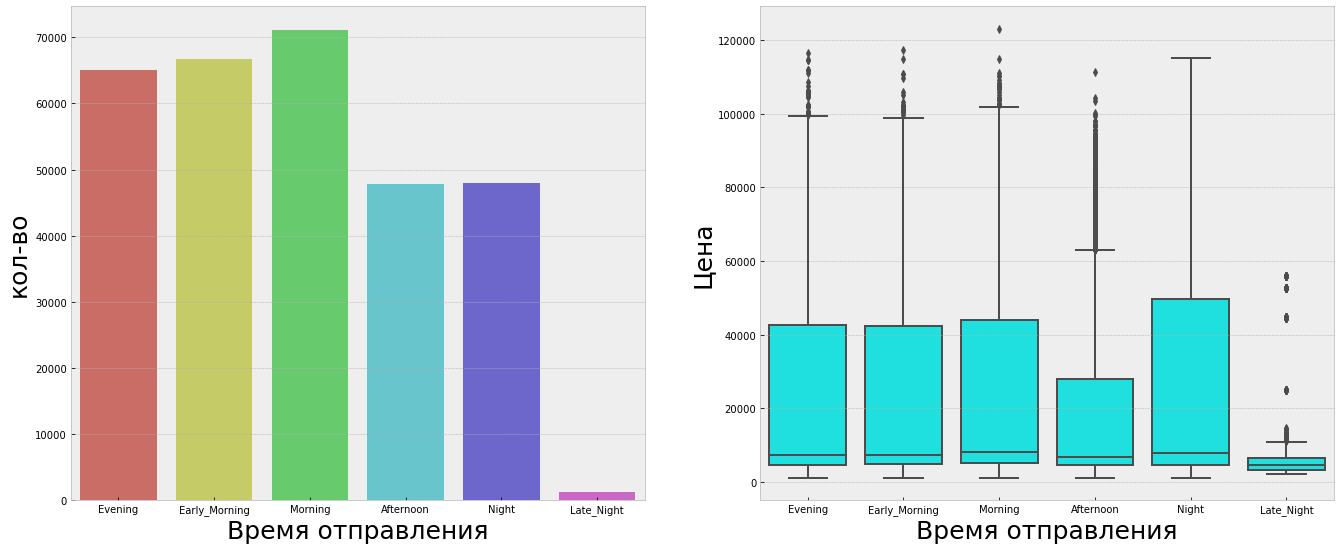

In [14]:
plt.figure(figsize=(35,20))
sns.countplot(df['departure_time'], ax = plt.subplot(2,3,1), palette='hls')
plt.xlabel('Время отправления',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['departure_time'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('Время отправления',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Больше всего вылетов Утром, а дешевле всего вылетать ранней ночью, но там и меньше всего вылетов, самое дорогое время отправки - ночь

### Stops 

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

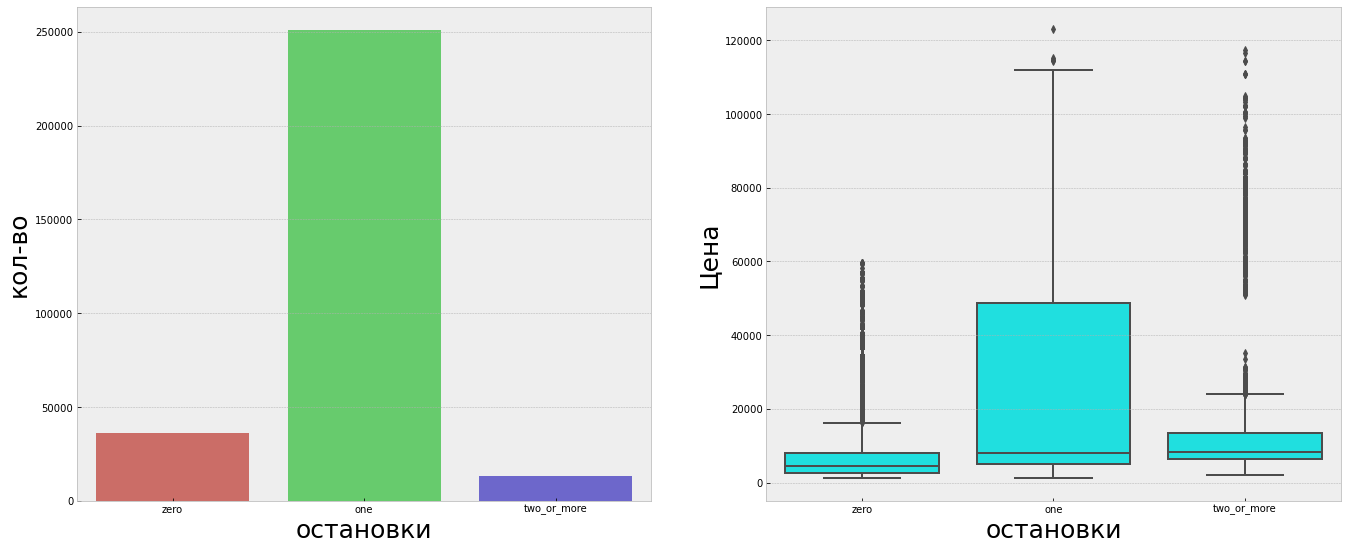

In [15]:
plt.figure(figsize=(35,20))
sns.countplot(df['stops'], ax = plt.subplot(2,3,1), palette='hls')
plt.xlabel('остановки',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['stops'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('остановки',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Больше всего в рейсе происходи одна остановка и рейсы с одной остановкой являются самыми дорогими, как и рейсы с 3 и более остановками(много выбросов), но они довольно редки, возможно это рейсы на дальнее расстояние

### Arrival Time	

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

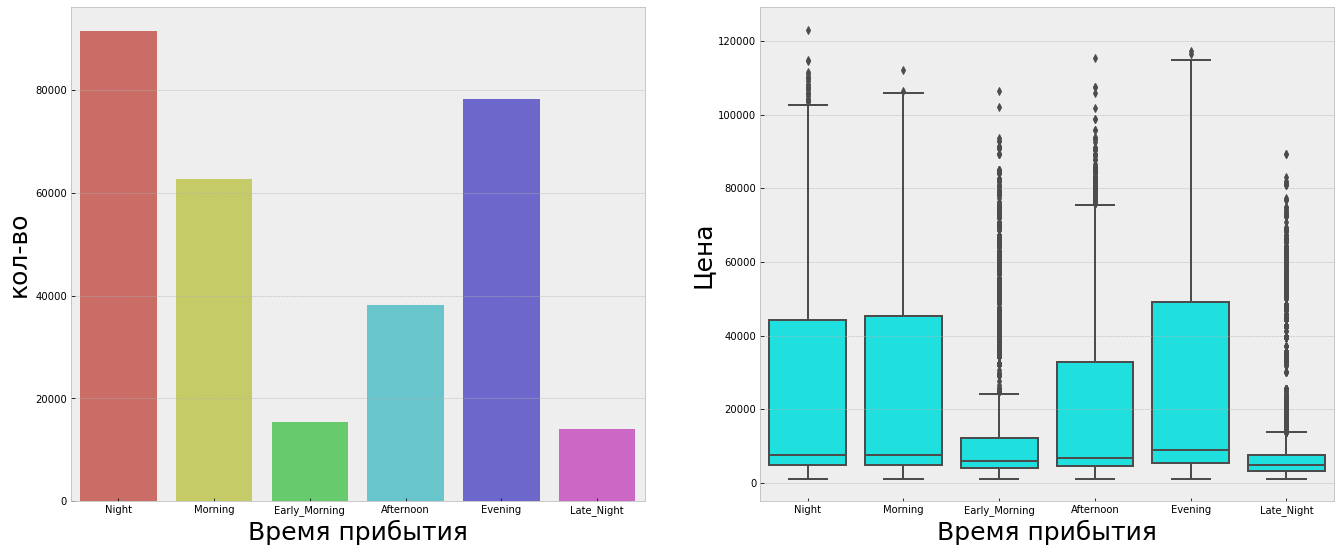

In [16]:
plt.figure(figsize=(35,20))
sns.countplot(df['arrival_time'], ax = plt.subplot(2,3,1), palette='hls')
plt.xlabel('Время прибытия',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['arrival_time'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('Время прибытия',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Больше всего прилетают ночью, а меньше всего ранней ночью, где и дешевле всего, самым дорогим временем прибытия является вечер

### Destination City

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

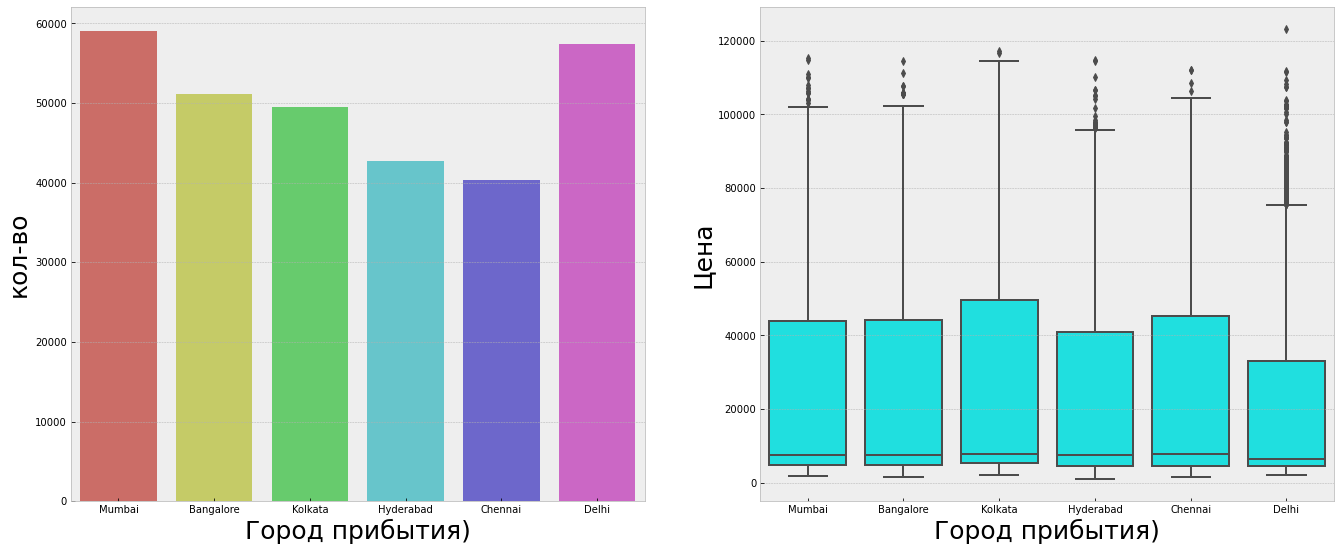

In [17]:
plt.figure(figsize=(35,20))
sns.countplot(df['destination_city'], ax = plt.subplot(2,3,1),  palette='hls')
plt.xlabel('Город прибытия)',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['destination_city'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('Город прибытия)',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Ну летят вся в мумбаии, хотя билеты дешевле в Дели, а вот в Ченаи никто не хочет лететь, хотя самые дорогие билеты в Колькуту

### Class

C:\Users\nudan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Цена')

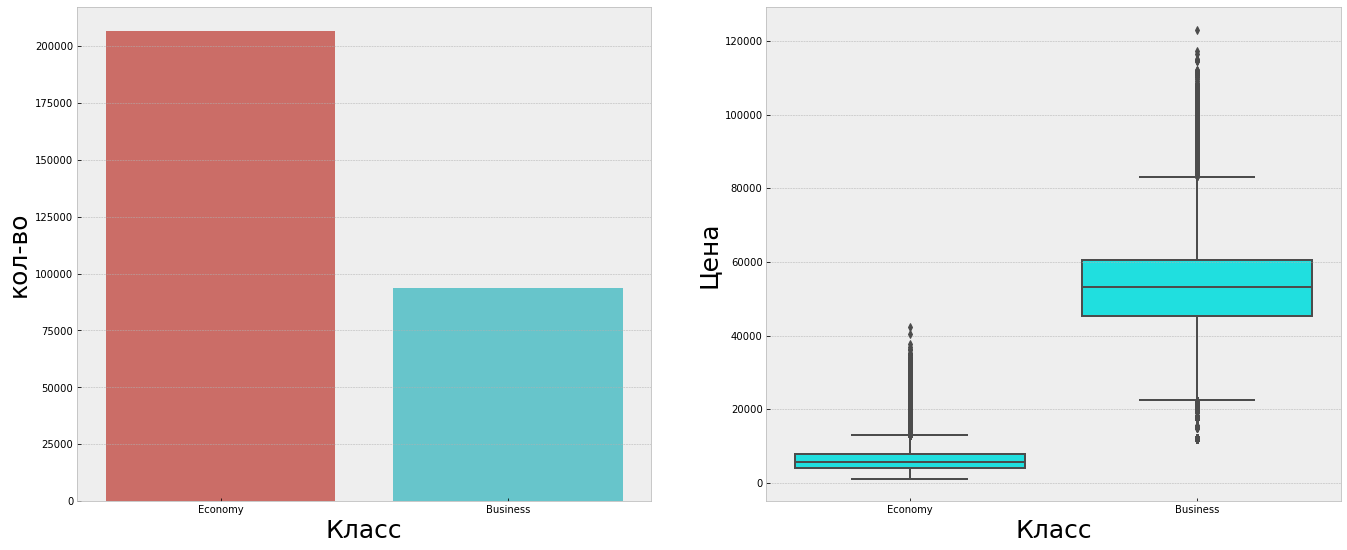

In [56]:
plt.figure(figsize=(35,20))
sns.countplot(df['class'], ax = plt.subplot(2,3,1), palette='hls')
plt.xlabel('Класс',fontsize=25)
plt.ylabel('кол-во',fontsize=25)

sns.boxplot(y=df['price'],x=df['class'], ax = plt.subplot(2,3,2), color='Aqua')  
plt.xlabel('Класс',fontsize=25)
plt.ylabel('Цена',fontsize=25)

Логично что большинство летают эконом классом, а бизнес класс дороже :)

Text(0.5, 1.0, 'Airline prices based on the class and company')

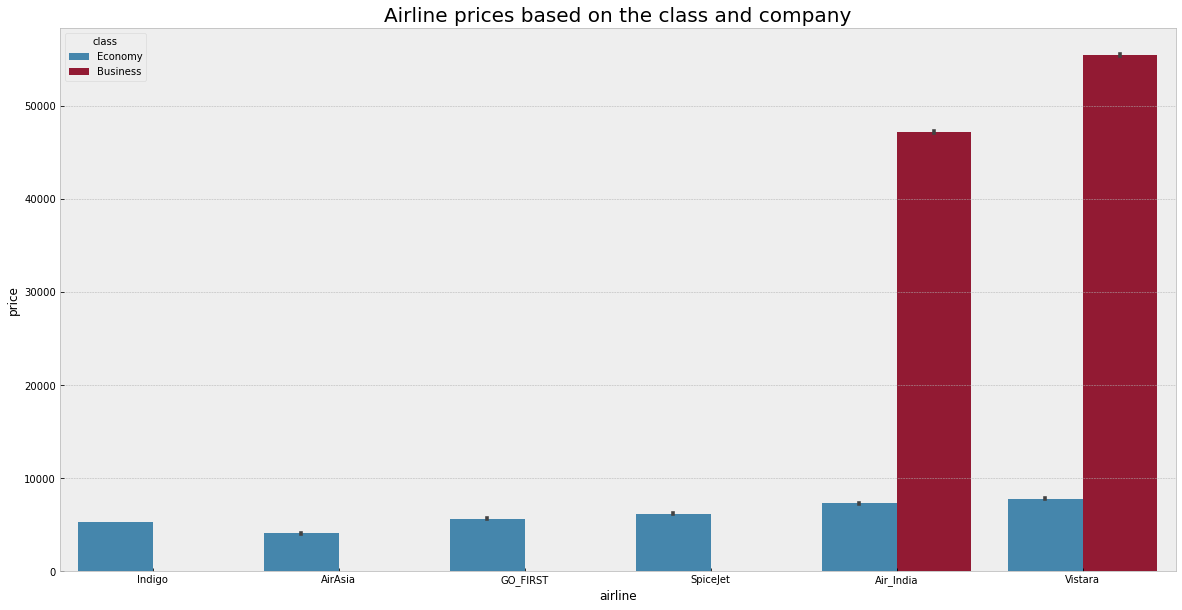

In [59]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

Только две авиакомпании предоставляют бизнес класс

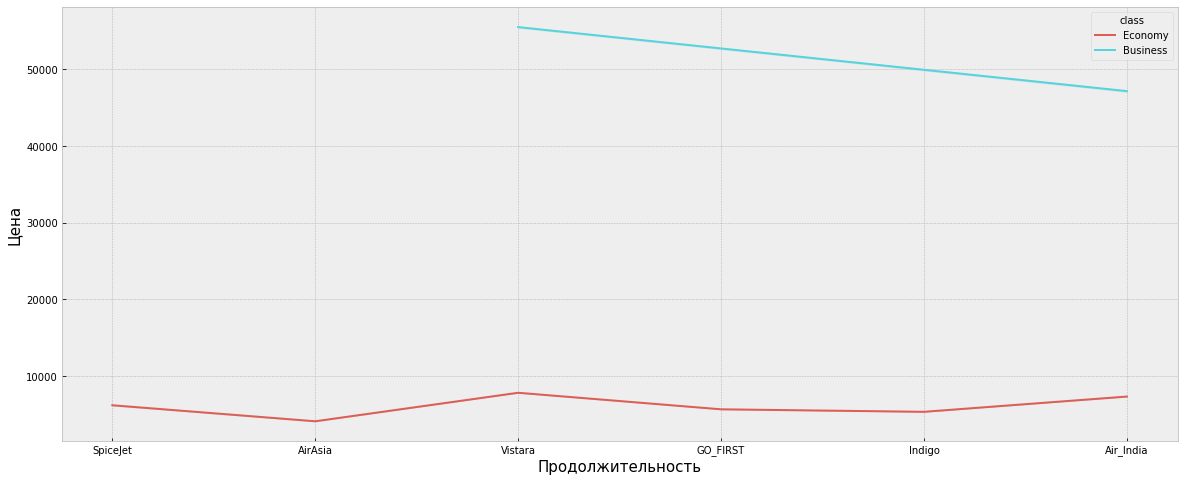

In [60]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='airline',y='price',hue='class',palette='hls')
plt.xlabel('Продолжительность',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

Те авиалинии, что предоставляют бизнес класс, имеюют более дорогие билеты на эконом класс

### Duration

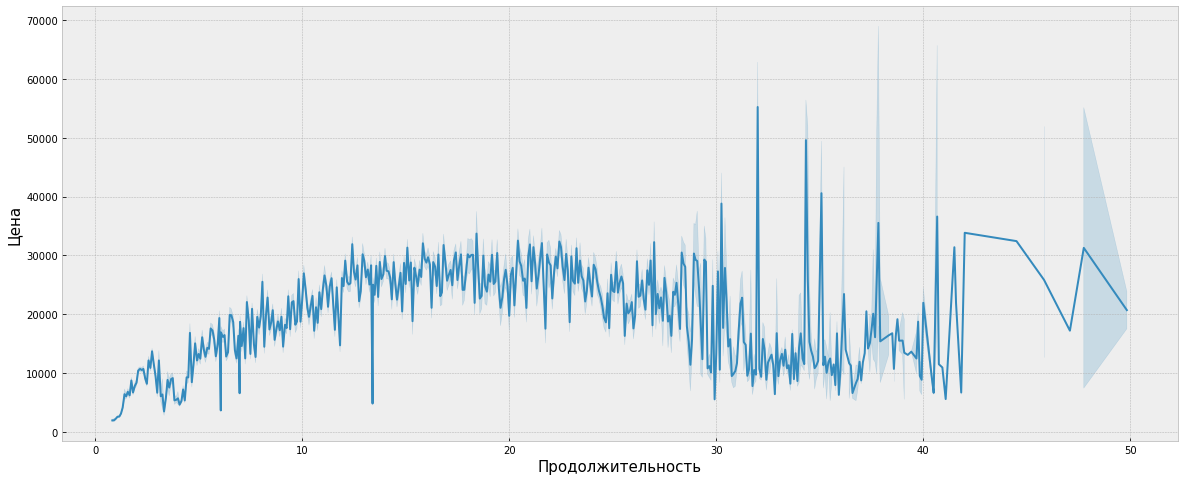

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',palette='hls')
plt.xlabel('Продолжительность',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

О дальности полета, плавно возрастает цена, после 30 часов, график растет аиниевне и сачка образно

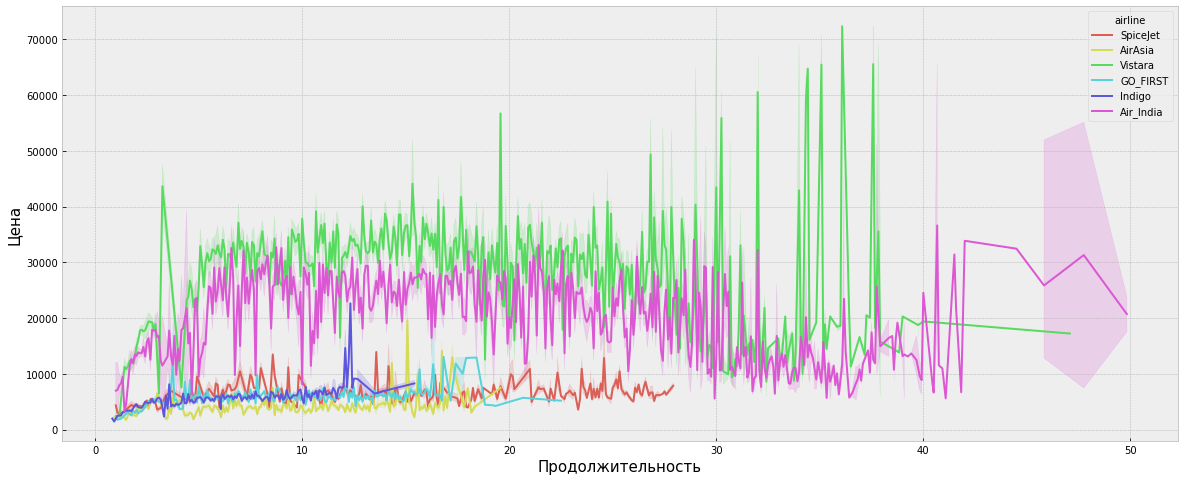

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='airline',palette='hls')
plt.xlabel('Продолжительность',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

Индиго проводит самые короткие полеты, малые компания, без бизнес класса проводят короткие перелеты, а самые дальние перелеты проводит Air_Indigo, а цена за самые дельнее билеты сильно разниться

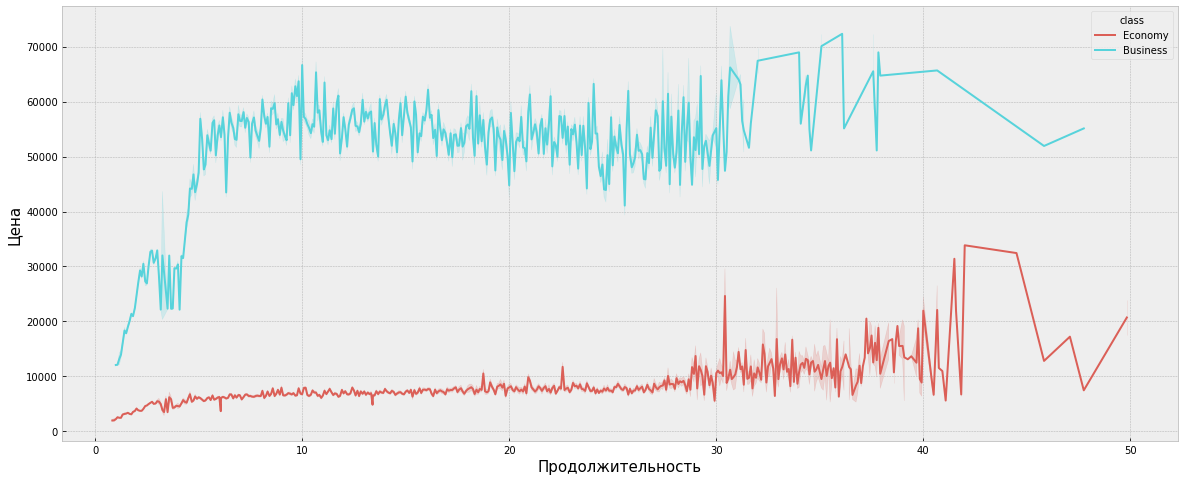

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='duration',y='price',hue='class',palette='hls')
plt.xlabel('Продолжительность',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

Экном класс плавно растет до 30 часов полета, после растет активнее и скачко образно, есть продолжительные прямые участки, вероятно там единичные данные

Бизнес класс имееит большой скачек после 5 часов полета, а после скачко обрасно растет 

### Days Left

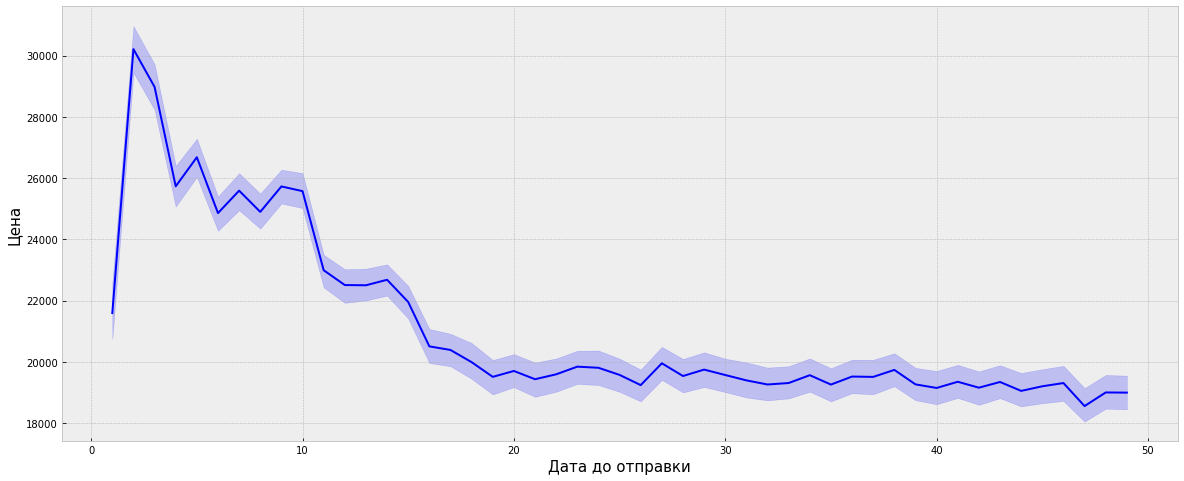

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.xlabel('Дата до отправки',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

Перед оправкой цена билета падает, это авиакомпания удешевляют билеты перед вылетом, дабы самолет был полным по мере одоления от вылета цена на билет падает, то есть выгоднее всего купать билеты за 20 дней до вылета, либо в последний момент

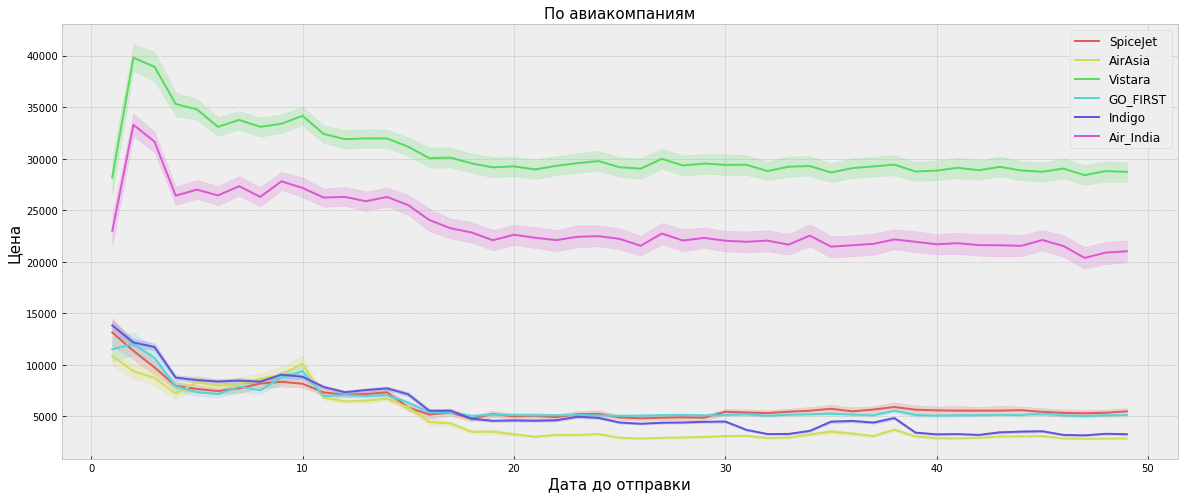

In [27]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('По авиакомпаниям',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Дата до отправки',fontsize=15)
plt.ylabel('Цена',fontsize=15)
plt.show()

Тактику полного самолета пользуются, только большие авиакомпании, все остальные имеют максимальную цену, перед вылетом

## Обучения моделей 

In [29]:
# Преобразовать обекты в числа, для обучения 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


<Figure size 2160x2160 with 0 Axes>

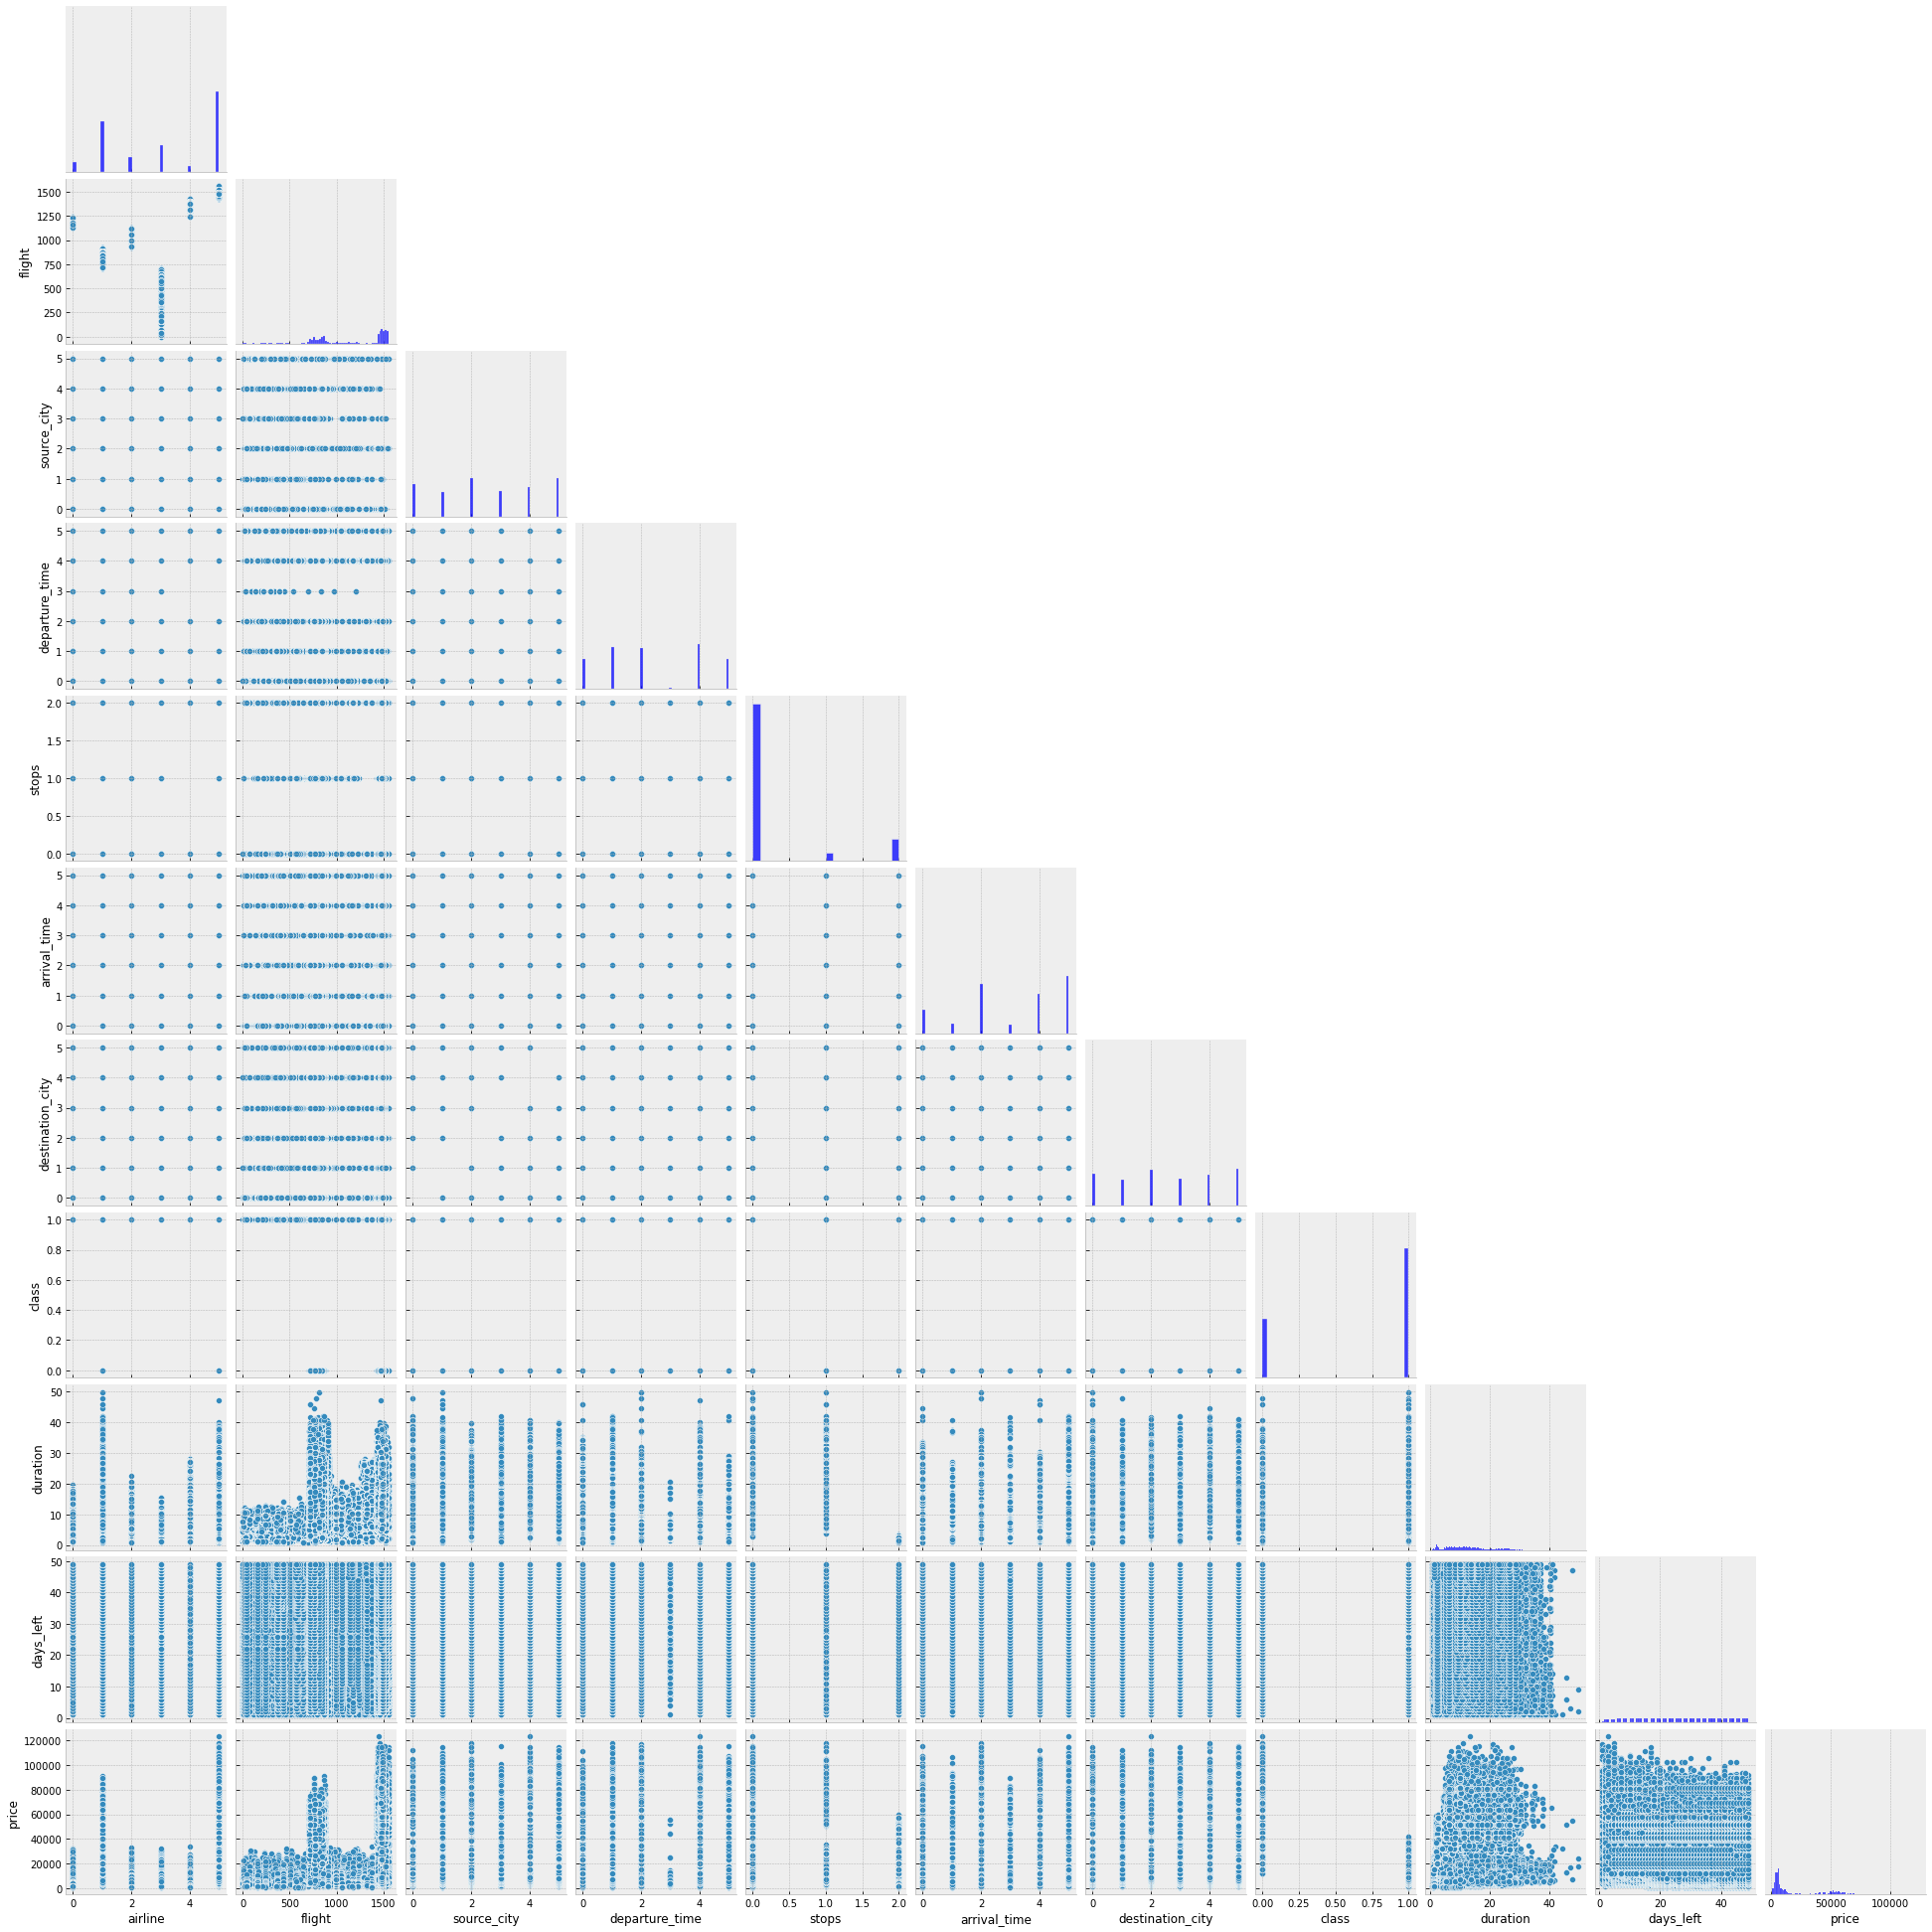

In [31]:
plt.figure(figsize=(30,30))
sns.pairplot(data=df, corner=True)

Графики попарно зависемости, выдны прямые диния, все признаки зависят о друг друга 

In [61]:
# plt.figure(figsize=(12,10))
# p=sns.heatmap(df.corr(), annot=True) 

Нужно уточнить 

In [33]:
# Отделение целевой переменой 
x=df.drop(['price'],axis=1)
y=df['price']

In [34]:
# Разбиение на тестовую и тренировочную часть 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [35]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [36]:
# Cоздение итоговой таблице результовот моделей 
a={'Model Name':[], 
   'Adj_R_Square':[] }
Results=pd.DataFrame(a)

,Model Name,Adj_R_Square


In [37]:
# Подключение библеотек 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Создание моделей 

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)



MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR,  modelbag,modelRE, modelLO]

for models in MM:
    
    # Обученни каждой модели 
    
    models.fit(x_train, y_train)
    
    # оценка результата 

    y_pred = models.predict(x_test)

    from sklearn import metrics
    
    # Добавление в итоговую таблицу  

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    
    new_row = {'Model Name' : models,
               'Adj_R_Square' : adjusted_r_squared}
    
    Results = Results.append(new_row, ignore_index=True)
    

C:\Users\nudan\AppData\Local\Temp\ipykernel_1248\147917394.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\nudan\AppData\Local\Temp\ipykernel_1248\147917394.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\nudan\AppData\Local\Temp\ipykernel_1248\147917394.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ignore_index=True)
C:\Users\nudan\AppData\Local\Temp\ipykernel_1248\147917394.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(new_row, ign

In [38]:
Results

,Model Name,Adj_R_Square
0,LinearRegression(),0.904653
1,DecisionTreeRegressor(),0.973827
2,"(DecisionTreeRegressor(max_features='auto', ra...",0.984114
3,KNeighborsRegressor(),0.971645
4,"(ExtraTreeRegressor(random_state=1745142891), ...",0.984682
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.956823
6,(DecisionTreeRegressor(random_state=1659781099...,0.983124
7,Ridge(),0.904653
8,Lasso(alpha=0.1),0.904653


In [39]:
# Сортировка моделей 
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square
0,ExtraTreesRegressor,0.984682
1,RandomForestRegressor,0.984114
2,XGBRegressor,0.983124
3,DecisionTreeRegressor,0.973827
4,KNeighborsRegressor,0.971645
5,GradientBoostingRegressor,0.956823
6,LinearRegression,0.904653
7,BaggingRegressor,0.904653
8,Ridge Regression,0.904653


<AxesSubplot:xlabel='days_left', ylabel='Price_actual'>

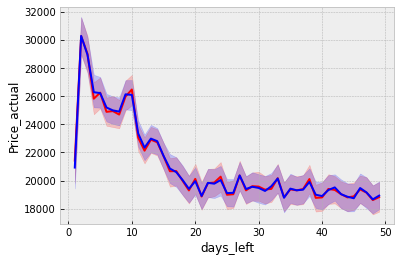

In [62]:
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')

Отклонение предсказанной цены от реальной 

<AxesSubplot:xlabel='Price_actual', ylabel='Price_pred'>

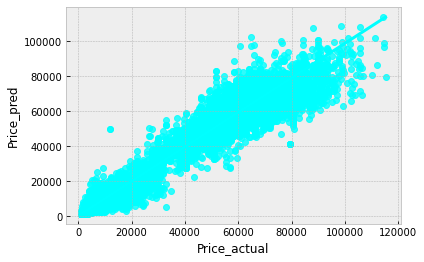

In [42]:
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')

Распределение предсказанных значений 